<a href="https://colab.research.google.com/github/GiangTTran/SparseRandomModeDecomposition/blob/main/data/synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Synthetic Data

Creates the synthetic data used in the mathematical examples from the [SRMD paper](https://arxiv.org/abs/2204.06108) (Sections 3.1-3.4).

The signals are also plotted using the visualization tools from srmdpy.

In [1]:
# download module from github
%pip install git+https://github.com/GiangTTran/SparseRandomModeDecomposition.git#egg=srmdpy

  Cloning https://github.com/GiangTTran/SparseRandomModeDecomposition.git to /tmp/pip-install-4p5y148v/srmdpy_b7ae1435e8364558acbcef13e51d8219
  Running command git clone -q https://github.com/GiangTTran/SparseRandomModeDecomposition.git /tmp/pip-install-4p5y148v/srmdpy_b7ae1435e8364558acbcef13e51d8219
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for srmdpy: filename=srmdpy-0.0.1-py3-none-any.whl size=11216 sha256=817da96608eb0504a5812b54b4e7edd22398b73d96d0a6fcbfe8d0261404007a
  Stored in directory: /tmp/pip-ephem-wheel-cache-8snhs6xb/wheels/5b/89/54/7798db729d46561a5ecaef26ca37c2f67537ef21a8c732e2d5
Successfully built srmdpy


In [2]:
import numpy as np

import srmdpy.visualization as plot

twopi = 2 * np.pi

## 3.1 Discontinuous Time-Series

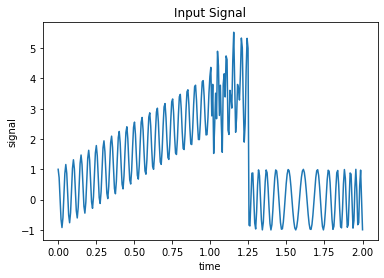

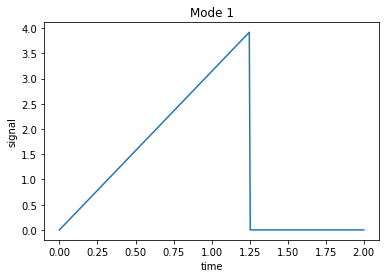

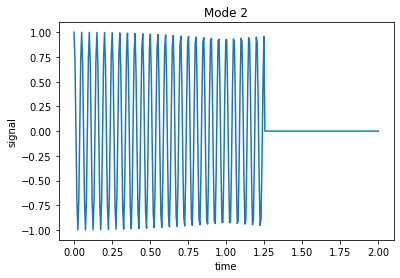

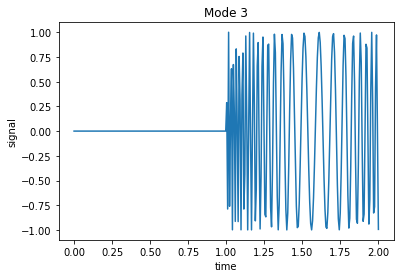

In [3]:
# Number of samples
m = 320

# Create time points
t = np.linspace(0, 2, num=m)

# Define modes
domain1 = (t < 5/4)
domain2 = (1 < t)
y1 = (0.5*twopi*t) * domain1
y2 = (np.cos(20*twopi*t)) * domain1
y3 = np.cos(4/3*((twopi*t-10)**3 - (twopi-10)**3) + 10*twopi*(t-1)) * domain2

# Sum modes
y = y1 + y2 + y3

# Plot signal
plot.signal(t, y, title='Input Signal')

# Plot Modes
print('')
modes = np.column_stack((y1, y2, y3)) # stack modes into a single array
plot.all_modes(t, modes, title='Mode')

## 3.2 Instantanenous Frequencies of Intersecting Time-Series

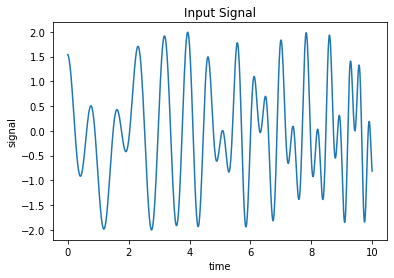

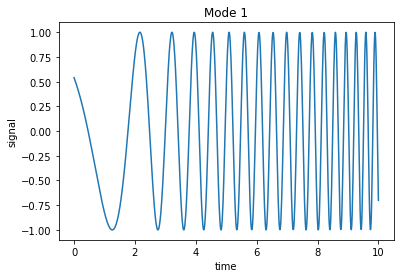

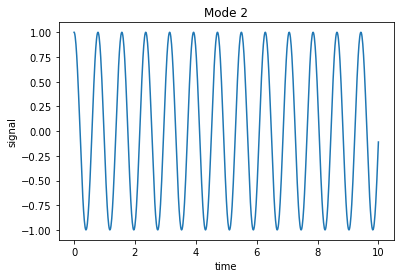

In [4]:
# Number of samples
m = 800

# Create time points
t = np.linspace(0, 10, num=m)

# Define modes
y1 = np.cos(t**2 + t + np.cos(t))
y2 = np.cos(8*t)

# Sum modes
y = y1 + y2

# Plot signal
plot.signal(t, y, title='Input Signal')

# Plot Modes
print('')
modes = np.column_stack((y1, y2)) # stack modes into a single array
plot.all_modes(t, modes, title='Mode')

## 3.3 Overlapping Time-Series with Noise

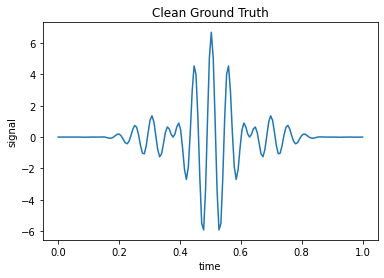

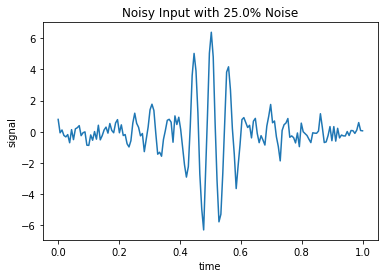

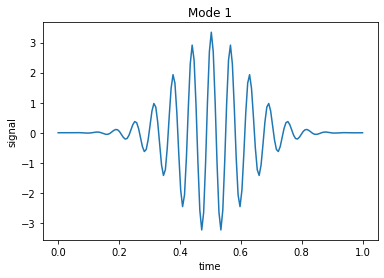

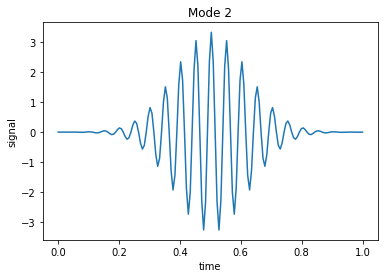

In [5]:
# Number of samples
m = 160

# Create time points
t = np.linspace(0, 1, num=m)

# Create frequencies
k = np.arange(m)

# Define a scaled Gaussian curve
def gaussian(k,mu,sigma):
    """Gaussian with standard deviation sigma, mean mu, and maximum of 1"""
    y = np.exp(-(k-mu)**2 / (2*sigma**2))
    return y

# Define modes in Fourier domain
# Note the multiplication of a complex exponential wave shifts the signal in
# time. These modes "overlap" in the Fourier domain in the sense that the
# Gaussian's width (3*sigma from mu) of the bell curves centered at mu=16 and
# mu=20 overlap in the domain 16 < k < 20.
timeshift = m*np.exp(-1j*np.pi*k)
Y1 = (gaussian(k, 16, 4/3) - gaussian(k, -16, 4/3)) * timeshift
Y2 = (gaussian(k, 20, 4/3) - gaussian(k, -20, 4/3)) * timeshift

# Invert Fourier
y1 = np.real(np.fft.ifft(Y1))
y2 = np.real(np.fft.ifft(Y2))

# Sum modes
y = y1 + y2

# Add noise
r = 0.25 # percentage of noise
sigma = r * np.linalg.norm(y) / np.sqrt(m)
noise = sigma * np.random.randn(m)
y_noisy = y + noise

# Plot clean signal
plot.signal(t, y, title='Clean Ground Truth')

# Plot noisy signal
print('')
noise_percent = np.linalg.norm(noise)/np.linalg.norm(y) # close to 25%
plot.signal(t, y_noisy, title=f'Noisy Input with {noise_percent:.1%} Noise')

# Plot Modes
print('')
modes = np.column_stack((y1, y2)) # stack modes into a single array
plot.all_modes(t, modes, title='Mode')

## 3.4 Pure Sinusoidal Signals with Noise

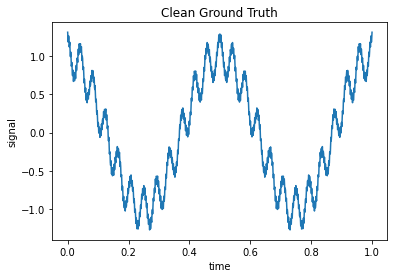

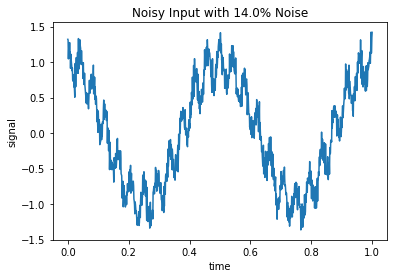

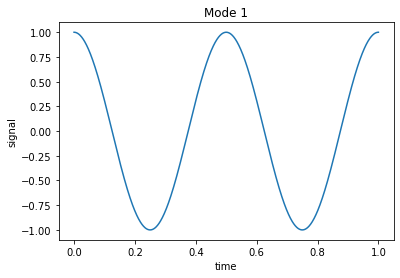

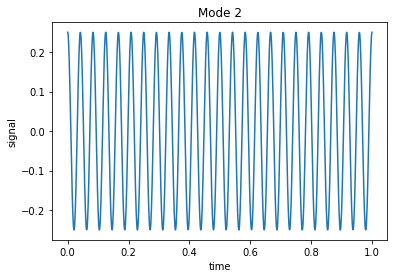

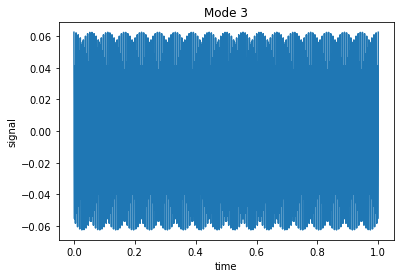

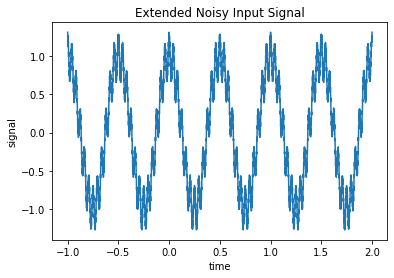

In [6]:
# Number of samples
m = 1000

# Create time points
t = np.linspace(0, 1, num=m)

# Define modes
y1 = np.cos(4.0 * np.pi * t)
y2 = np.cos(48.0 * np.pi * t) / 4.0
y3 = np.cos(576.0 * np.pi * t) / 16.0

# Sum modes
y = y1 + y2 + y3

# Add noise
sigma = 0.1
noise = sigma * np.random.randn(m)
y_noisy = y + noise

# Plot clean signal
plot.signal(t, y, title='Clean Ground Truth')

# Plot noisy signal
print('')
noise_percent = np.linalg.norm(noise)/np.linalg.norm(y) # close to 14%
plot.signal(t, y_noisy, title=f'Noisy Input with {noise_percent:.1%} Noise')

# Plot Modes
print('')
modes = np.column_stack((y1, y2, y3)) # stack modes into a single array
plot.all_modes(t, modes, title='Mode')

# Extend the signal to the left and right by mirroring it at the boundaries t=0
# and t=1. The returned signal is 3 times as long.
# Extend t
signal_length = t[-1] - t[0]
left   = -t[::-1]
middle = t
right  = -t[::-1] + 2*signal_length
t_extended = np.concatenate((left, middle, right))

# Extend signal
y_mirrored = y[::-1]
y_extended = np.concatenate((y_mirrored, y, y_mirrored))

# Plot noisy periodic extension of input signal
print('')
plot.signal(t_extended, y_extended, title=f'Extended Noisy Input Signal')